In [8]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
sp500 = yf.Ticker("^GSPC").history(period="1y")["Close"]
stock = yf.Ticker("AAPL").history(period="1y")["Close"]

df_sp500 = pd.DataFrame(sp500)
df_stock = pd.DataFrame(stock)


In [29]:
 #Calculate the market for the S&P return for a 3 day
df_sp500["Return"] = df_sp500["Close"].pct_change(periods=3)
df_stock["Return"] = df_stock["Close"].pct_change(periods=3)

df_sp500
  

,Close,Return
Date,,
2024-05-30 00:00:00-04:00,5235.479980,NaN
2024-05-31 00:00:00-04:00,5277.509766,NaN
2024-06-03 00:00:00-04:00,5283.399902,NaN
2024-06-04 00:00:00-04:00,5291.339844,0.010669
2024-06-05 00:00:00-04:00,5354.029785,0.014499
...,...,...
2025-05-22 00:00:00-04:00,5842.009766,-0.020389
2025-05-23 00:00:00-04:00,5802.819824,-0.023170
2025-05-27 00:00:00-04:00,5921.540039,0.013163


In [35]:
merged_df = pd.merge(df_sp500, df_stock, left_index=True, right_index=True)
merged_df

merged_df["Abnormal Return"] = merged_df["Return_x"] - merged_df["Return_y"]

merged_df

,Close_x,Return_x,Close_y,Return_y,Abnormal Return
Date,,,,,
2024-05-30 00:00:00-04:00,5235.479980,NaN,190.399567,NaN,NaN
2024-05-31 00:00:00-04:00,5277.509766,NaN,191.355087,NaN,NaN
2024-06-03 00:00:00-04:00,5283.399902,NaN,193.126801,NaN,NaN
2024-06-04 00:00:00-04:00,5291.339844,0.010669,193.445328,0.015997,-0.005327
2024-06-05 00:00:00-04:00,5354.029785,0.014499,194.958237,0.018830,-0.004330
...,...,...,...,...,...
2025-05-22 00:00:00-04:00,5842.009766,-0.020389,201.360001,-0.035540,0.015151
2025-05-23 00:00:00-04:00,5802.819824,-0.023170,195.270004,-0.056028,0.032858
2025-05-27 00:00:00-04:00,5921.540039,0.013163,200.210007,-0.009303,0.022465


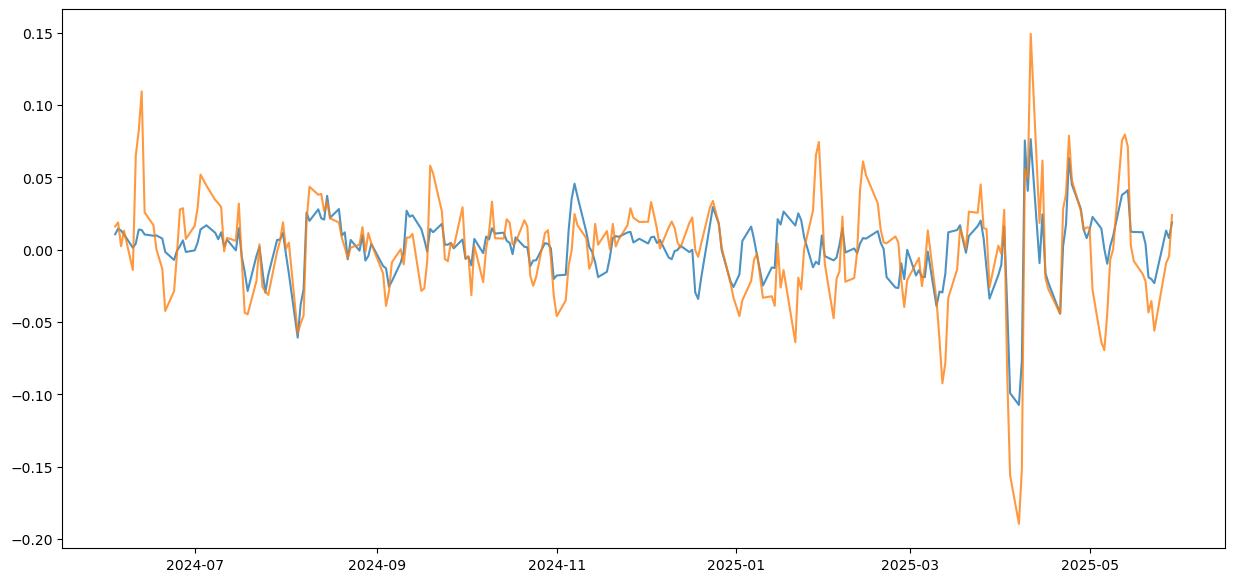

In [51]:
plt.figure(figsize=(15, 7))
#Plot the lines of the SP500 and stock respectively
plt.plot(merged_df.index, merged_df["Return_x"], label="Stock Return", alpha=0.8)
plt.plot(merged_df.index, merged_df["Return_y"], label="S&P 500 Return", alpha=0.8)

#plt.axvline(trade_date, color='red', linestyle='--', label="Trade Date")